In [1]:
import tensorflow as tf
import numpy as np
from modules.data import simulate_schrodinger
from modules.plots import plot_training_loss, plot_schrodinger_model
from modules.models import SchroedingerPinn

In [2]:
def f_init(tx):
    h = 2.0 / tf.cosh(tx[:, 1:2])
    return tf.concat([h, tf.zeros_like(h)], axis=1)

In [3]:
x_start = -5
length = 10
time = np.pi / 2
(tx_samples, y_samples), (tx_init, h_init), tx_boundary = simulate_schrodinger(1000, f_init, x_start, length, time)

2022-10-31 01:13:08.338700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:13:08.417854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:13:08.418271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 01:13:08.418971: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
network = SchroedingerPinn.build_network([32, 64])
sch_pinn = SchroedingerPinn(network)
sch_pinn.compile()

In [5]:
inputs = tf.stack([tx_samples, tx_init, tx_boundary], axis=0)
outputs = tf.stack([h_init])

In [6]:
history = sch_pinn.fit(inputs, outputs, epochs = 5000, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), progress_interval = 200, n_boundary_samples=1000)

Epoch: 0 Loss: 5.4966 Total Elapsed Time: 1.74
Epoch: 200 Loss: 0.2807 Total Elapsed Time: 6.21
Epoch: 400 Loss: 0.1767 Total Elapsed Time: 10.31
Epoch: 600 Loss: 0.1524 Total Elapsed Time: 14.29
Epoch: 800 Loss: 0.1403 Total Elapsed Time: 18.31
Epoch: 1000 Loss: 0.1295 Total Elapsed Time: 22.30
Epoch: 1200 Loss: 0.1206 Total Elapsed Time: 26.33
Epoch: 1400 Loss: 0.1153 Total Elapsed Time: 30.30
Epoch: 1600 Loss: 0.1111 Total Elapsed Time: 34.29
Epoch: 1800 Loss: 0.1075 Total Elapsed Time: 38.31
Epoch: 2000 Loss: 0.1043 Total Elapsed Time: 42.34
Epoch: 2200 Loss: 0.1018 Total Elapsed Time: 46.41
Epoch: 2400 Loss: 0.0989 Total Elapsed Time: 50.42
Epoch: 2600 Loss: 0.0965 Total Elapsed Time: 54.66
Epoch: 2800 Loss: 0.0947 Total Elapsed Time: 58.74
Epoch: 3000 Loss: 0.0924 Total Elapsed Time: 62.82
Epoch: 3200 Loss: 0.0902 Total Elapsed Time: 66.92
Epoch: 3400 Loss: 0.0885 Total Elapsed Time: 70.94
Epoch: 3600 Loss: 0.0868 Total Elapsed Time: 74.95
Epoch: 3800 Loss: 0.0861 Total Elapsed T

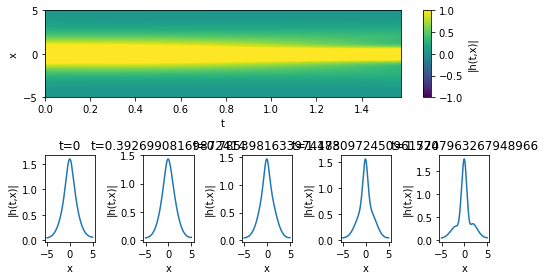

In [7]:
plot_schrodinger_model(sch_pinn.network, x_start, length, time)

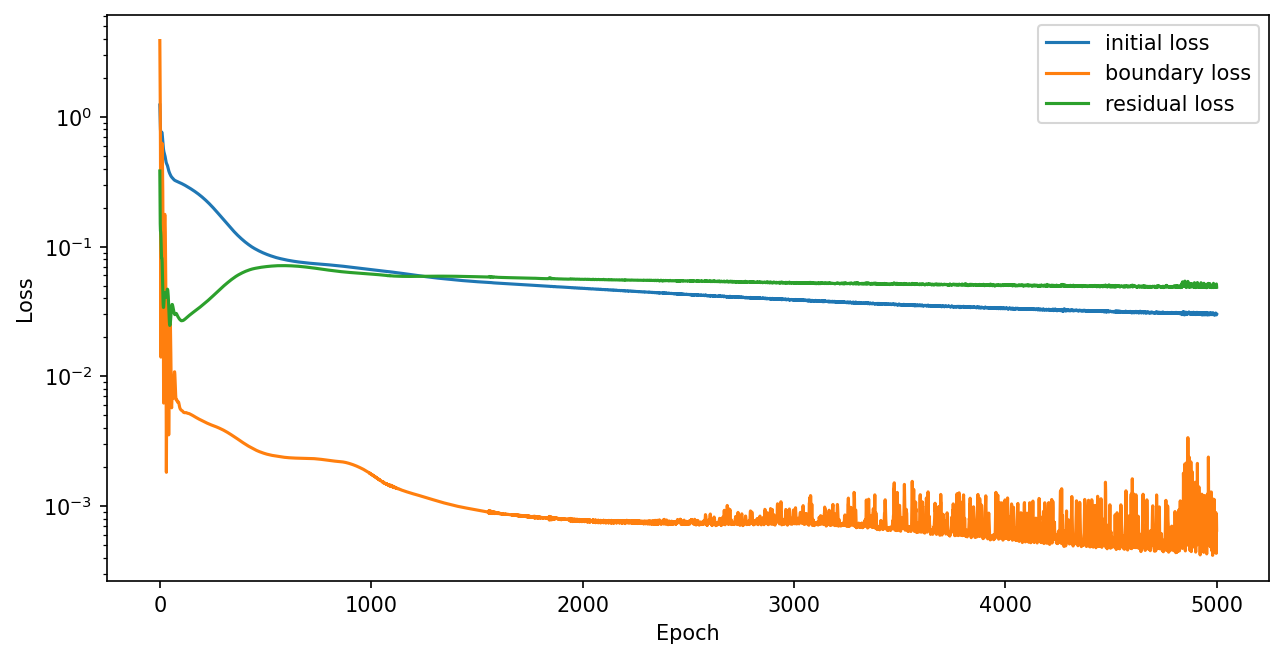

In [8]:
plot_training_loss(history, y_scale='log')